# **EDA**

### Realizaremos un `E`xploratory `D`ata `A`nalysis (`EDA`) sobre los datos de interés para examinarlos con más en detalle

---

In [4]:
# Librerias a utilizar
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

---

#### Datos globales de terremotos de 1970 a 2023 :

##### `Diccionario de datos`

+    index: Un identificador único para cada fila en el DataFrame.
+    mag: La magnitud del terremoto en la escala de Richter.
+    place: La ubicación geográfica del terremoto.
+    felt: La cantidad de personas que reportaron haber sentido el terremoto.
+    cdi: La intensidad del terremoto según la escala de Intensidad de Daño Comunitario (CDI, por sus siglas en inglés).
+    mmi: La intensidad del terremoto según la escala de Intensidad de Mercalli Modificada (MMI, por sus siglas en inglés).
+    tsunami: Un valor binario que indica si el terremoto produjo un tsunami o no.
+    sig: La significancia del terremoto en función de su magnitud y distancia.
+    net: La red sismológica que registró el terremoto.
+    code: Un código identificador único para cada terremoto.
+    types: Los tipos de datos que se proporcionan para el terremoto.
+    nst: El número de estaciones que registraron el terremoto.
+    dmin: La distancia mínima a la fuente del terremoto.
+    rms: La amplitud máxima de las ondas sísmicas registradas.
+    gap: El ángulo entre las estaciones más lejanas que registraron el terremoto.
+    magType: El tipo de magnitud reportado para el terremoto.
+    type: El tipo de evento sísmico, que en este caso siempre será un terremoto.
+    year: El año en que ocurrió el terremoto.
+    month: El mes en que ocurrió el terremoto.


In [2]:
# Ingestamos el archivo parquet
df_global = pd.read_parquet("Datasets/Usa_Jap_Mex/terremotos_global.parquet")
# Observamos
df_global.sample(3)

,index,mag,place,felt,cdi,mmi,tsunami,sig,net,code,types,nst,dmin,rms,gap,magType,type,year,month
313659,314354,4.6,"95 km NE of Kainantu, Papua New Guinea",NaN,NaN,NaN,0,326,us,b000fjlu,",cap,impact-text,origin,phase-data,",42.0,NaN,0.97,70.8,mb,earthquake,2013,3
338671,339367,4.6,"200 km NNW of Sabang, Indonesia",0.0,1.0,NaN,0,326,us,c000syd3,",cap,dyfi,origin,phase-data,",NaN,3.388,0.94,59.0,mb,earthquake,2014,11
113918,114584,4.7,"243 km S of Sofifi, Indonesia",NaN,NaN,NaN,0,340,us,p0006tze,",origin,phase-data,",NaN,NaN,0.90,NaN,mb,earthquake,1995,3


In [3]:
# Observamos más en detalle
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461048 entries, 0 to 461047
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    461048 non-null  int64  
 1   mag      461048 non-null  float64
 2   place    459651 non-null  object 
 3   felt     38695 non-null   float64
 4   cdi      38695 non-null   float64
 5   mmi      18467 non-null   float64
 6   tsunami  461048 non-null  int64  
 7   sig      461048 non-null  int64  
 8   net      461048 non-null  object 
 9   code     461048 non-null  object 
 10  types    461048 non-null  object 
 11  nst      176184 non-null  float64
 12  dmin     140595 non-null  float64
 13  rms      406035 non-null  float64
 14  gap      273486 non-null  float64
 15  magType  461039 non-null  object 
 16  type     461048 non-null  object 
 17  year     461048 non-null  int64  
 18  month    461048 non-null  int64  
dtypes: float64(8), int64(5), object(6)
memory usage: 66.8+ MB


In [36]:
# Observamos el comportamiento de las variables numéricas
df_global.describe()

,index,mag,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,year,month
count,461048.000000,461048.000000,38695.000000,38695.000000,18467.000000,461048.000000,461048.000000,176184.000000,140595.000000,406035.000000,273486.000000,461048.000000,461048.000000
mean,231165.300986,4.597782,78.442434,2.547202,4.598284,0.003106,329.856902,55.702805,3.874431,0.920468,112.482951,2003.801431,6.484184
std,133204.071489,0.460669,1273.392820,1.728197,1.739744,0.055645,76.968319,76.758335,5.063592,0.338663,53.122950,13.416054,3.457315
min,1.000000,3.380000,0.000000,0.000000,0.000000,0.000000,176.000000,0.000000,0.000000,-1.000000,0.000000,1970.000000,1.000000
25%,115927.750000,4.300000,0.000000,1.000000,3.840000,0.000000,284.000000,16.000000,1.157000,0.730000,73.000000,1995.000000,3.000000
50%,231212.500000,4.500000,1.000000,2.000000,4.672000,0.000000,312.000000,28.000000,2.393000,0.920000,108.000000,2006.000000,6.000000
75%,346481.250000,4.800000,6.000000,3.800000,5.804500,0.000000,354.000000,60.000000,4.495000,1.100000,142.000000,2015.000000,10.000000
max,461818.000000,9.100000,131619.000000,9.100000,10.000000,1.000000,2910.000000,929.000000,64.498000,69.320000,360.000000,2023.000000,12.000000


<Axes: >

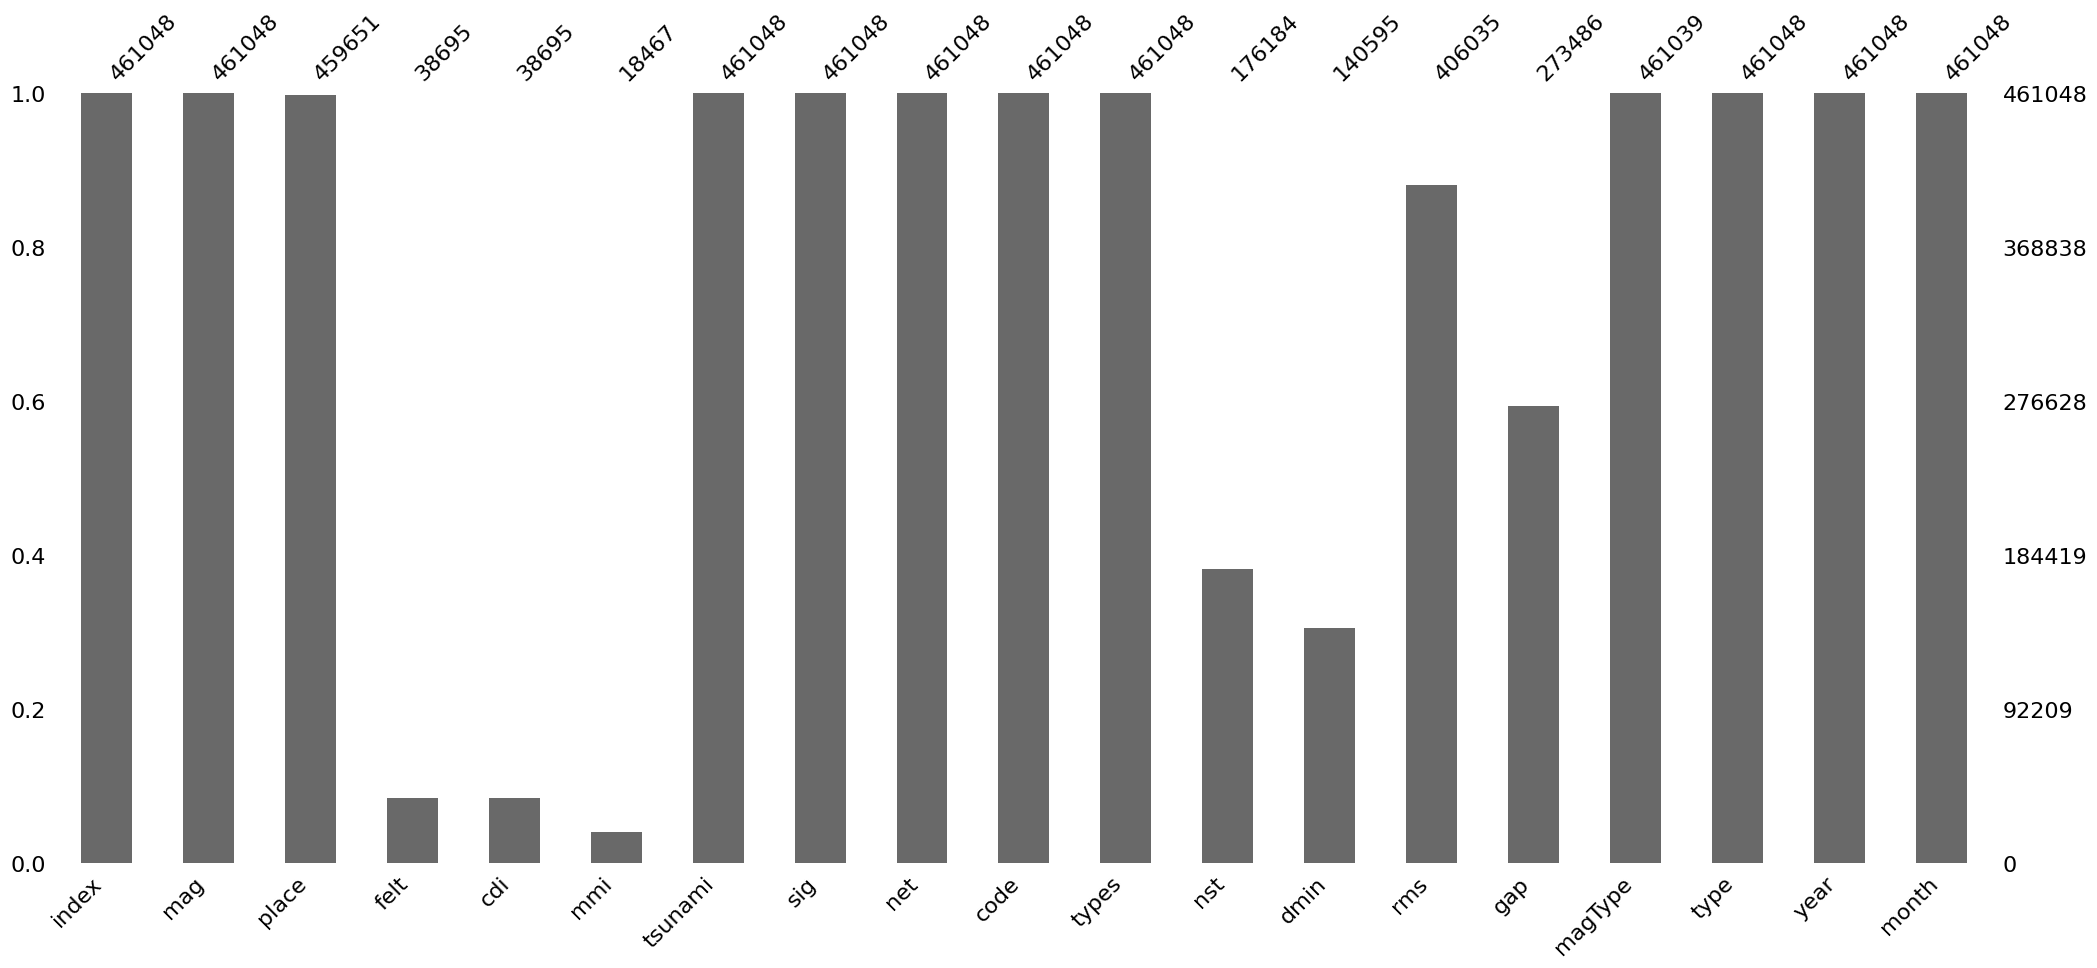

In [4]:
# Observemos los valores faltantes por columna
msno.bar(df_global)
# Se puede observar que hay columnas con demasiados valores faltantes

In [5]:
# Observamos si hay valores duplicados
df_global.duplicated().sum()

0

In [6]:
# Observamos los años con mas registros 
df_global["year"].value_counts().sort_values(ascending=False).head()

2014    16973
2021    16732
2011    15408
2005    15203
2022    15193
Name: year, dtype: int64

In [46]:
# Observamos el porcentaje de tsunamis en base al total (0 es negativo, 1 positivo)
df_global["tsunami"].value_counts(normalize=True) * 100

0    99.689403
1     0.310597
Name: tsunami, dtype: float64

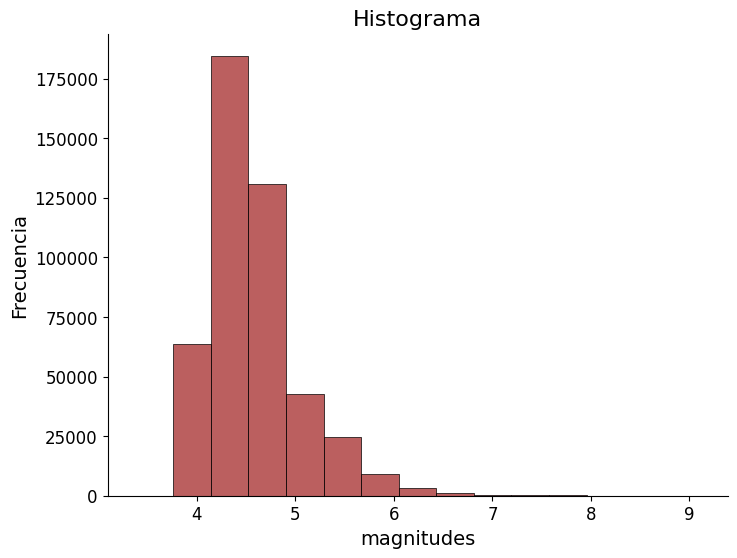

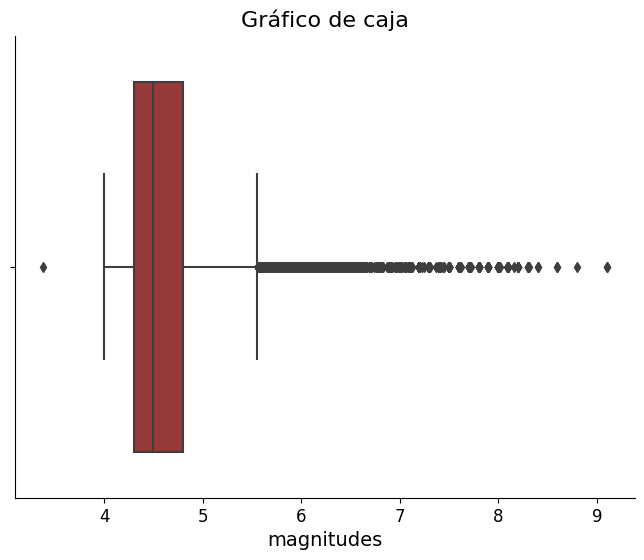

In [8]:
# Histograma de las magnitudes
plt.figure(figsize=(8,6))
sns.histplot(df_global["mag"] ,bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_global["mag"], color="brown")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

# Se pueden observar numerosos valores atípicos, lo cual en este caso es normal

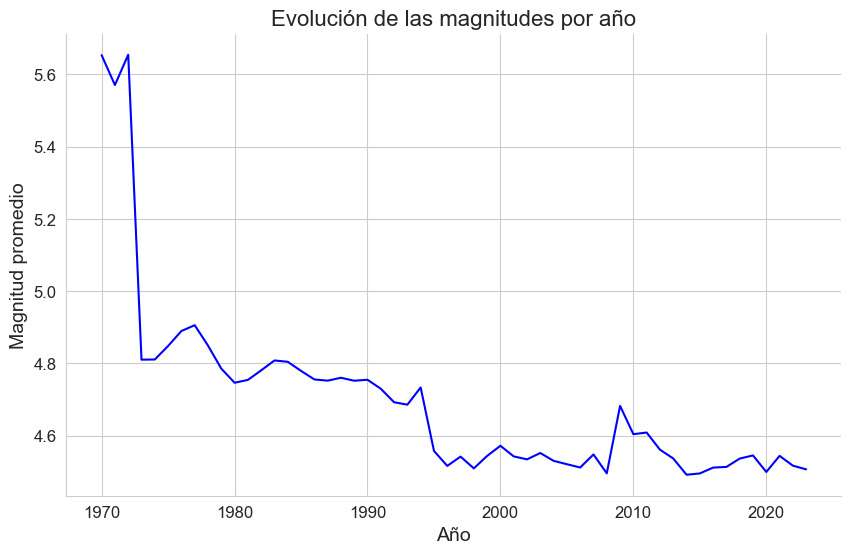

In [35]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped = df_global.groupby('year')['mag'].mean()

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, color='blue')

# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Magnitud promedio', fontsize=14)
plt.title('Evolución de las magnitudes por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Podemos observar la evolución de las magnitudes en funcion del año

---

# USA

##### Observaremos los mismos datos anteriores, pero centrados en Estados Unidos

In [9]:
# Ingestamos el archivo json
df_usa = pd.read_json("Datasets/Usa_Jap_Mex/Usa.json")
# Observamos
df_usa

,idCountry,year,month,location,distance,types,code,mag,felt,cdi,mmi,tsunami,sig,net,nst,dmin,rms,gap,magType
0,1,1975,6,Alabama,3 km NNW of Fayette,",origin,shakemap,trump-shakemap,",p0000brg,4.50,NaN,NaN,5.447,0,312,us,NaN,NaN,NaN,NaN,mb
1,1,1997,10,Alabama,15 km NNW of Flomaton,",impact-text,origin,phase-data,shakemap,trump-...",p00089hq,4.80,NaN,NaN,6.012,0,354,us,NaN,NaN,0.98,NaN,mb
2,1,2003,4,Alabama,8 km S of Valley Head,",associate,dyfi,focal-mechanism,impact-text,lo...",605341,4.60,17204.0,6.0,4.987,0,926,se,21.0,NaN,0.07,154.0,mw
3,1,2004,11,Alabama,4 km W of Forkland,",associate,dyfi,impact-text,moment-tensor,orig...",p000d7vw,4.30,85.0,5.0,NaN,0,327,us,61.0,NaN,0.90,78.9,mwr
4,1,1970,1,Aleutian Islands,Rat Islands,",impact-text,origin,trump-origin,",800290,5.73,NaN,NaN,NaN,0,505,iscgem,NaN,NaN,NaN,NaN,mw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22351,1,2013,9,Wyoming,20 km W of Fort Washakie,",dyfi,losspager,moment-tensor,origin,phase-dat...",b000jx4l,4.80,116.0,4.3,3.570,0,404,us,NaN,0.37800,1.08,16.0,mwr
22352,1,2014,3,Wyoming,22 km S of Mammoth,",cap,dyfi,general-link,general-text,losspager,...",60061837,4.83,22.0,2.9,5.570,0,700,uu,35.0,0.04763,0.25,63.0,mw
22353,1,2016,2,Wyoming,23 km SE of Kelly,",cap,dyfi,impact-text,losspager,moment-tensor,...",10004t1f,4.00,153.0,3.4,4.370,0,298,us,NaN,0.19500,1.16,18.0,mwr
22354,1,2016,8,Wyoming,4 km ENE of Bondurant,",cap,dyfi,impact-text,losspager,moment-tensor,...",20006umx,4.80,578.0,3.9,4.640,0,580,us,NaN,0.37300,1.14,7.0,mwr


In [10]:
# Observamos en detalle
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22356 entries, 0 to 22355
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCountry  22356 non-null  int64  
 1   year       22356 non-null  int64  
 2   month      22356 non-null  int64  
 3   location   21054 non-null  object 
 4   distance   22356 non-null  object 
 5   types      22356 non-null  object 
 6   code       22356 non-null  object 
 7   mag        22356 non-null  float64
 8   felt       2659 non-null   float64
 9   cdi        2659 non-null   float64
 10  mmi        2719 non-null   float64
 11  tsunami    22356 non-null  int64  
 12  sig        22356 non-null  int64  
 13  net        22356 non-null  object 
 14  nst        7038 non-null   float64
 15  dmin       5808 non-null   float64
 16  rms        18513 non-null  float64
 17  gap        10069 non-null  float64
 18  magType    22354 non-null  object 
dtypes: float64(8), int64(5), object(6)
memory usag

In [11]:
# Observamos las variables numéricas
df_usa.describe()

,idCountry,year,month,mag,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,22356.0,22356.000000,22356.000000,22356.000000,2659.000000,2659.000000,2719.000000,22356.000000,22356.000000,7038.000000,5808.000000,18513.000000,10069.000000
mean,1.0,1999.487967,6.473430,4.512716,467.561113,3.071455,3.887884,0.035069,324.637950,78.947712,0.977332,0.783407,134.149752
std,0.0,14.711042,3.399115,0.479395,3647.503574,1.649557,1.532001,0.183958,96.249933,100.758224,1.324885,0.415886,64.481627
min,1.0,1970.000000,1.000000,3.380000,0.000000,0.000000,0.000000,0.000000,176.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.0,1987.000000,4.000000,4.180000,1.000000,1.000000,2.955000,0.000000,271.000000,23.000000,0.149000,0.580000,81.100000
50%,1.0,2000.000000,6.000000,4.400000,5.000000,3.100000,3.920000,0.000000,298.000000,45.000000,0.597650,0.850000,134.600000
75%,1.0,2013.000000,9.000000,4.700000,80.000000,4.100000,4.730000,0.000000,354.000000,90.000000,1.387000,1.030000,179.000000
max,1.0,2023.000000,12.000000,8.200000,131619.000000,9.100000,9.296000,1.000000,1870.000000,885.000000,24.651000,17.050000,354.000000


In [17]:
# Observamos que Estado tiene mas terremotos
df_usa["location"].value_counts().head(15)

 Alaska              14854
 California           1823
 Aleutian Islands     1425
 Hawaii                630
 Oregon                604
 Washington            363
 Nevada                327
 Georgia               163
 Idaho                 153
 Montana                95
 Oklahoma               92
 Wyoming                84
 Utah                   62
 New Mexico             38
 Texas                  37
Name: location, dtype: int64

In [20]:
# Observamos la cantidad de registros por años
df_usa["year"].value_counts().sort_values(ascending = False).head(15)

1986    752
2018    739
1980    710
2020    698
1996    690
2016    665
2017    618
2003    594
2014    581
2015    579
2002    552
2021    550
2010    550
1992    485
2008    475
Name: year, dtype: int64

---

# Japón

##### Sigue manteniendo la misma estructura de datos anteriormente vista

In [28]:
# Ingestamos
df_japon = pd.read_json("Datasets/Usa_Jap_Mex/Japón.json")
# Observamos
df_japon

,idCountry,year,month,place,types,code,mag,felt,cdi,mmi,tsunami,sig,net,nst,dmin,rms,gap,magType
11,2,1970,1,"45 km SSW of Obihiro, Japan",",origin,shakemap,trump-shakemap,",800254,6.40,NaN,NaN,6.419,0,630,iscgem,NaN,NaN,NaN,NaN,mw
74,2,1970,2,"Volcano Islands, Japan region",",origin,",799066,5.53,NaN,NaN,NaN,0,470,iscgem,NaN,NaN,NaN,NaN,mw
101,2,1970,3,"67 km NE of Naze, Japan",",origin,",798599,5.54,NaN,NaN,NaN,0,472,iscgem,NaN,NaN,NaN,NaN,mw
119,2,1970,3,"101 km WSW of Kurio, Japan",",origin,",798320,5.70,NaN,NaN,NaN,0,500,iscgem,NaN,NaN,NaN,NaN,mw
121,2,1970,3,"4 km WSW of Takanosu, Japan",",origin,shakemap,",798303,5.70,NaN,NaN,3.951,0,500,iscgem,NaN,NaN,NaN,NaN,mw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461039,2,2023,5,"75 km ESE of Katsuren-haebaru, Japan",",origin,phase-data,",7000jxal,5.10,NaN,NaN,NaN,0,400,us,58.0,0.883,0.99,79.0,mww
461040,2,2023,5,"81 km SE of Taira, Japan",",origin,phase-data,",7000jxaj,5.00,NaN,NaN,NaN,0,385,us,44.0,0.845,0.95,78.0,mb
461041,2,2023,5,"79 km ESE of Katsuren-haebaru, Japan",",dyfi,internal-moment-tensor,internal-origin,l...",7000jxag,5.90,10.0,3.1,3.841,0,539,us,76.0,0.871,0.75,57.0,mww
461043,2,2023,5,"82 km ESE of Katsuren-haebaru, Japan",",dyfi,internal-moment-tensor,moment-tensor,ori...",7000jxaa,5.30,2.0,2.7,NaN,0,433,us,74.0,0.909,0.83,64.0,mww


In [31]:
df_japon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39841 entries, 11 to 461044
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCountry  39841 non-null  int64  
 1   year       39841 non-null  int64  
 2   month      39841 non-null  int64  
 3   place      39841 non-null  object 
 4   types      39841 non-null  object 
 5   code       39841 non-null  object 
 6   mag        39841 non-null  float64
 7   felt       3510 non-null   float64
 8   cdi        3510 non-null   float64
 9   mmi        954 non-null    float64
 10  tsunami    39841 non-null  int64  
 11  sig        39841 non-null  int64  
 12  net        39841 non-null  object 
 13  nst        17950 non-null  float64
 14  dmin       10278 non-null  float64
 15  rms        36538 non-null  float64
 16  gap        24855 non-null  float64
 17  magType    39841 non-null  object 
dtypes: float64(8), int64(5), object(5)
memory usage: 5.8+ MB


In [32]:
df_japon.describe()

,idCountry,year,month,mag,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,39841.0,39841.000000,39841.000000,39841.000000,3510.000000,3510.000000,954.000000,39841.000000,39841.000000,17950.000000,10278.000000,36538.000000,24855.000000
mean,2.0,2003.943300,6.328230,4.582358,19.115670,2.570513,4.505371,0.000502,326.866419,68.425738,1.977038,0.889955,114.031821
std,0.0,13.116885,3.417468,0.429150,109.825265,1.589478,1.447937,0.022400,71.330941,90.945229,1.540317,0.250568,39.387350
min,2.0,1970.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,246.000000,4.000000,0.028000,0.000000,8.000000
25%,2.0,1995.000000,3.000000,4.300000,0.000000,1.000000,3.836500,0.000000,284.000000,20.000000,1.021250,0.720000,90.000000
50%,2.0,2008.000000,6.000000,4.500000,2.000000,2.500000,4.298000,0.000000,312.000000,34.000000,1.725500,0.890000,120.000000
75%,2.0,2013.000000,9.000000,4.800000,10.000000,3.600000,5.319500,0.000000,354.000000,73.000000,2.560750,1.050000,135.500000
max,2.0,2023.000000,12.000000,9.100000,5680.000000,9.100000,9.115000,1.000000,2419.000000,929.000000,44.071000,1.940000,335.700000


In [29]:
# Observamos las ubicaciones donde mas terremotos hay
df_japon["place"].value_counts()

Bonin Islands, Japan region             3496
Izu Islands, Japan region               3395
Volcano Islands, Japan region           1819
off the east coast of Honshu, Japan      369
near the east coast of Honshu, Japan     197
                                        ... 
206 km S of Itoman, Japan                  1
89 km SE of Itoman, Japan                  1
66 km NE of Misawa, Japan                  1
200 km NW of Naze, Japan                   1
81 km SE of Taira, Japan                   1
Name: place, Length: 18008, dtype: int64

In [30]:
# Observamos los registros por año
df_japon["year"].value_counts().sort_values(ascending=False).head(15)

2011    5557
2012    1335
2022    1286
2016    1204
2014    1204
2010    1177
2015    1172
2000    1159
2021    1121
2004    1061
2005    1048
2008    1036
2013    1011
2018     959
2020     906
Name: year, dtype: int64

---

# México

In [47]:
# eda de mexico, si se animan a hacerlo lo pueden hacer :p
# Ingestamos el archivo
df_mex = pd.read_json("Datasets/Usa_Jap_Mex/México.json")
# Observamos
df_mex

,idCountry,Fecha,Hora,Distancia,Estado,Latitud,Longitud,Magnitud,Profundidad
0,3,1970-02-03,23:08:50,141 km al SUR de SAN MARCOS,GRO,15.524,-99.493,6.6,21.0
1,3,1970-04-29,08:01:34,62 km al SUROESTE de CD HIDALGO,CHIS,14.463,-92.683,7.3,44.0
2,3,1970-04-30,02:32:58,100 km al SUROESTE de MAPASTEPEC,CHIS,14.608,-93.260,6.5,22.0
3,3,1971-09-30,02:18:00,92 km al SUROESTE de PUEBLO YAQUI,SON,26.880,-110.800,6.5,14.0
4,3,1972-10-20,02:17:46,238 km al OESTE de CIHUATLAN,JAL,18.700,-106.756,6.6,10.0
...,...,...,...,...,...,...,...,...,...
42697,3,2023-05-08,20:30:27,9 km al SUROESTE de CD IXTEPEC,OAX,16.490,-95.140,4.0,2.1
42698,3,2023-05-08,22:24:25,17 km al SURESTE de SALINA CRUZ,OAX,16.080,-95.080,4.0,12.2
42699,3,2023-05-09,00:16:55,13 km al NOROESTE de RIO GRANDE,OAX,16.110,-97.500,4.2,8.9
42700,3,2023-05-09,03:56:09,8 km al OESTE de TEHUANTEPEC,OAX,16.340,-95.310,4.6,13.9


###### NOTA : les recomiendo que usen los archivos JSON de la carpeta Datasets/ , por ejemplo "Datasets/KPI 1/...." , que estan mas organizados por KPI y asi. 
###### Y gracias por su tiempo y ayuda <3

---

# KPI 1

# KPI 1. Aumentar la cantidad de pólizas contratadas de inmuebles

El objetivo de este KPI es aumentar la cantidad de pólizas contratadas en un 10% para viviendas que cumplan con la norma de resistencia sísmica, con respecto al año anterior que se encontraban por fuera del sistema de seguros.
Objetivo: aumentar la cantidad de pólizas contratadas 
Indicador: 10%
Plazo: anual
Meta: alcanzar el 10% en un año
Monitoreo: con las bases de datos que ofrecen las aseguradoras se analiza y se compara.
Relevante: porque está alineado con el objetivo 2 de Implementar mecanismos de comunicación y alerta a la comunidad civil en un lenguaje intuitivamente, pues si para adquirir la póliza se exige que la vivienda tenga el cumplimiento de construcciones contra sismos se va a minimizar los daños en los edificios y la seguridad mejorará y esto puede ser asequible por internet.
Para medir este KPI se requiere conocer la cantidad de pólizas adquiridas el año anterior y la cantidad de pólizas adquiridas el siguiente año.


In [31]:
# # KPI 1. Aumentar la cantidad de pólizas contratadas de inmuebles
# Para este KPI se encuentran datos de las polizas de los paises de Japon y Mexico
#Primero la tabla de Japon: muestra los porcentajes de penetración año por año en cada estado.
# Ingestamos el archivo json (incremento_polizas.json)
df_kpi1 = pd.read_json("Datasets/KPI 1/incremento_polizas.json")

# Observamos
df_kpi1.sample(3)

# existe información de los años 2015 al 2021 de los Estados de Japon

,%,2015,2016,2017,2018,2019,2020,2021,idCountry
4,Akita,68.5,69.5,70.8,72.0,73.3,74.4,74.8,2
39,Fukuoka,64.0,67.2,68.8,71.5,73.3,75.3,76.3,2
7,Ibaraki,60.5,61.9,62.2,63.8,64.6,66.0,66.5,2


---

In [32]:
# Observamos más en detalle
df_kpi1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %          48 non-null     object 
 1   2015       48 non-null     float64
 2   2016       48 non-null     float64
 3   2017       48 non-null     float64
 4   2018       48 non-null     float64
 5   2019       48 non-null     float64
 6   2020       48 non-null     float64
 7   2021       48 non-null     float64
 8   idCountry  48 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
# Existen 47 prefectures o estados en Japon y se encuentran datos del año 2015 a 2021

In [33]:
# Observamos el comportamiento de las variables numéricas
df_kpi1.describe()


,2015,2016,2017,2018,2019,2020,2021,idCountry
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,61.527083,63.766667,64.958333,67.216667,68.868750,70.410417,71.279167,2.0
std,8.901368,8.507852,8.357538,7.850798,7.626721,7.471371,7.465551,0.0
min,39.200000,45.000000,47.500000,50.100000,52.000000,53.600000,54.400000,2.0
25%,55.575000,57.725000,59.000000,62.050000,63.925000,65.725000,66.325000,2.0
50%,61.300000,62.700000,63.600000,65.350000,66.900000,68.600000,69.850000,2.0
75%,65.850000,68.125000,69.375000,71.625000,73.350000,74.625000,75.625000,2.0
max,86.200000,86.400000,86.300000,86.800000,87.000000,87.500000,88.700000,2.0


In [ ]:
#Se observa que se tienen 48 registros no nulos, el promedio siempre ha estado superior a 61.5 y a crecido cada año
# la desviación estandar disminuye cada año pero al aumentar el promedio cada año implica que la industria de seguros de inmuebles
# en japon ha madurado con el tiempo y se ha vuelto mas estable y predecible. Es decir, a medida que la industria se ha desarrollado
#y ha establecido practicas y regulaciones mas estables y seguras, se ha reducido la variabilidad en la penetracion de ventas de
#ventas de polizas de inmuebles.

<AxesSubplot: >

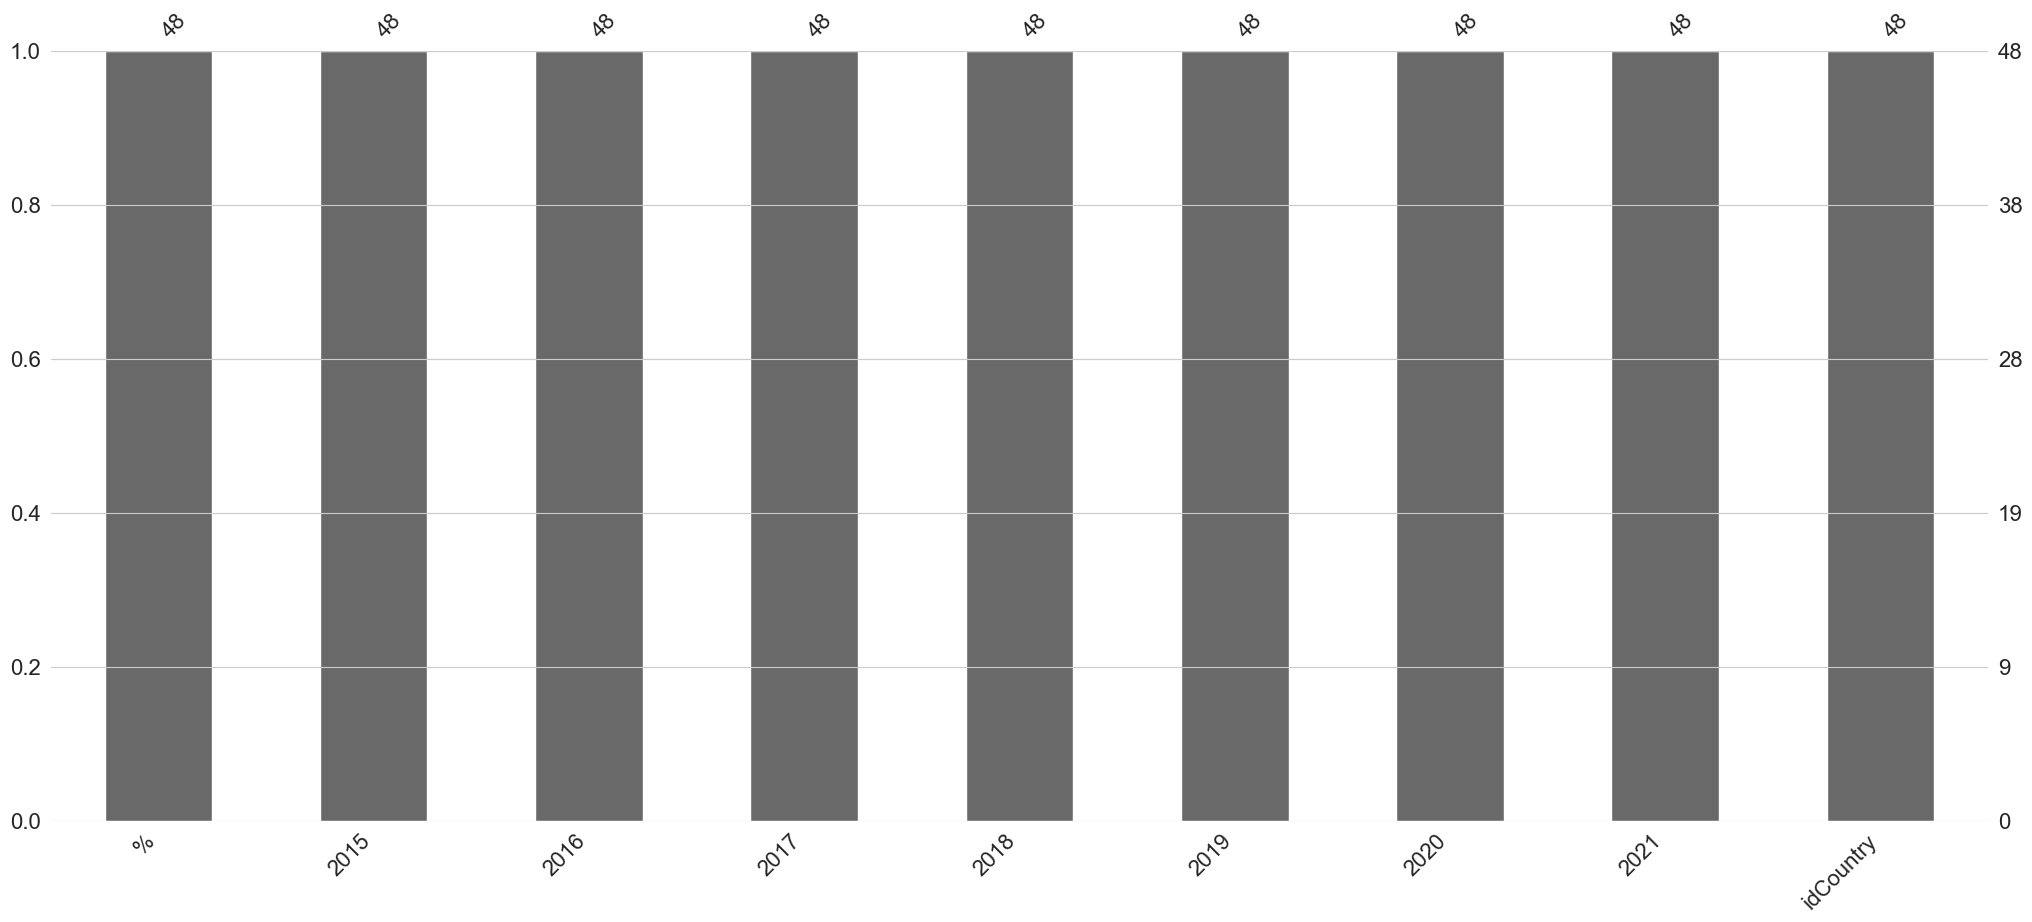

In [34]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1)
# la información esta completa, existen 48 registros incluye totales

In [35]:
# Observamos si hay valores duplicados
df_kpi1.duplicated().sum()
#no hay valores duplicados

0

In [41]:
df_kpi1 = df_kpi1.rename(columns={"%": "prefecture"})


In [42]:
# Observamos más en detalle
df_kpi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prefecture  48 non-null     object 
 1   2015        48 non-null     float64
 2   2016        48 non-null     float64
 3   2017        48 non-null     float64
 4   2018        48 non-null     float64
 5   2019        48 non-null     float64
 6   2020        48 non-null     float64
 7   2021        48 non-null     float64
 8   idCountry   48 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.8+ KB


In [46]:
# Observamos las prefactures con mas valores mas altos

columns = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
penetracion_mas_alta = df_kpi1.set_index('prefecture')[columns].sum(axis=1).sort_values(ascending=False).head(5)
print(penetracion_mas_alta)


prefecture
Miyagi       608.9
Kochi        602.2
Miyazaki     567.9
Kagoshima    556.1
Kumamoto     547.7
dtype: float64


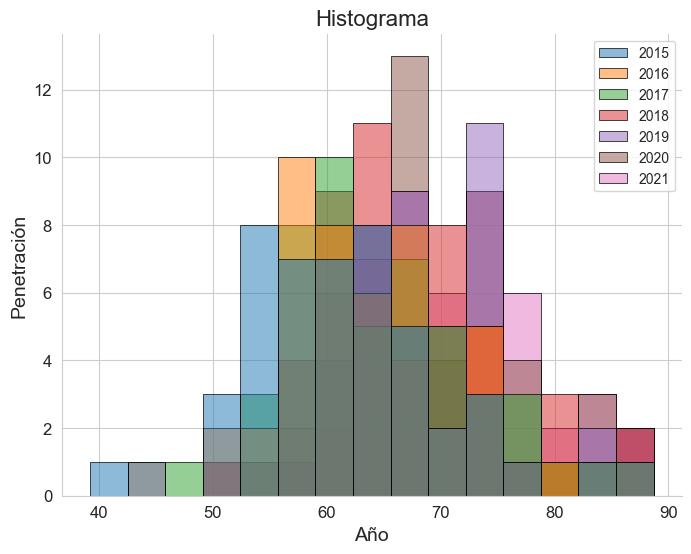

In [47]:
# Histograma de las magnitudes
plt.figure(figsize=(8,6))
sns.histplot(df_kpi1.set_index('prefecture')[columns],bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

#se concluye que las penetraciones mas altas se dieron en el año 2021, pero realizare un analisis por año para verificar

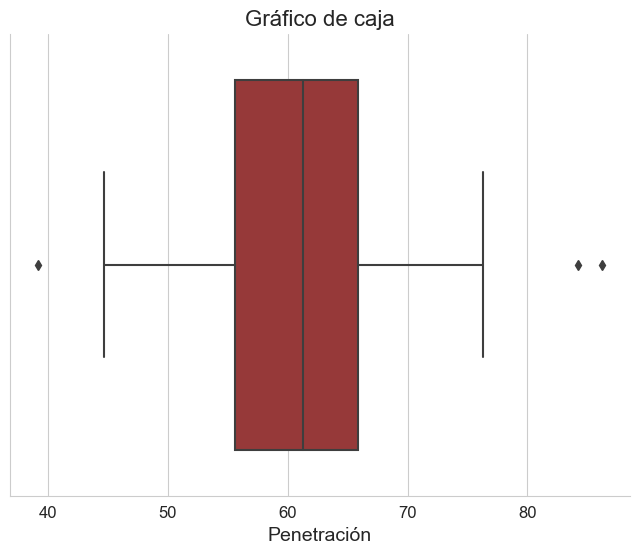

In [51]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2015'], color="brown")
plt.title("Gráfico de caja 2015", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()


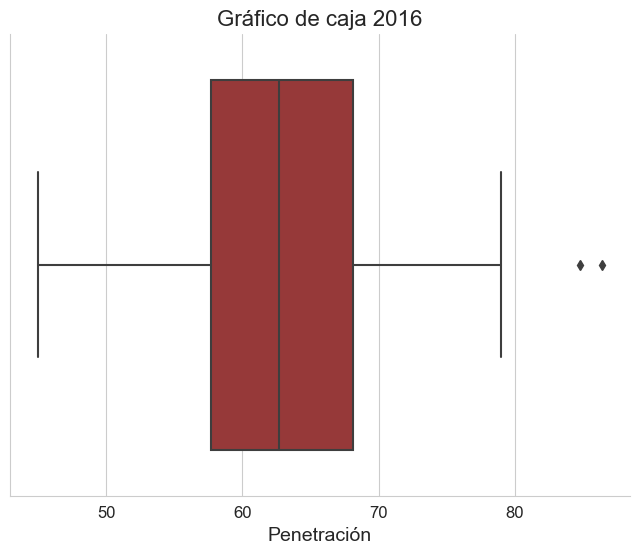

In [52]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2016'], color="brown")
plt.title("Gráfico de caja 2016", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

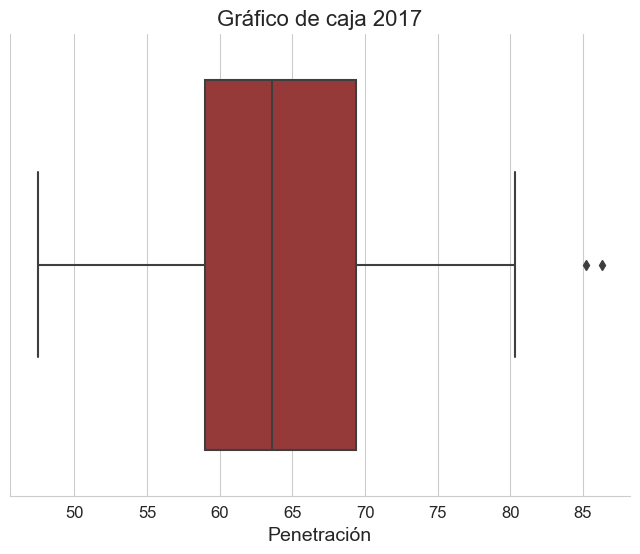

In [53]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2017'], color="brown")
plt.title("Gráfico de caja 2017", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

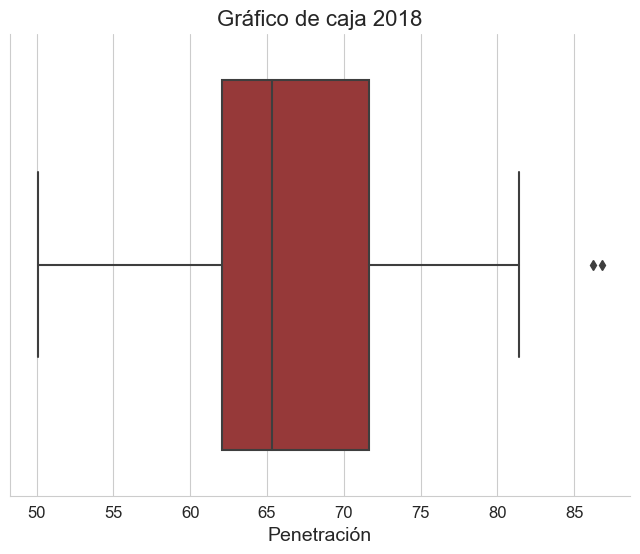

In [54]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2018'], color="brown")
plt.title("Gráfico de caja 2018", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

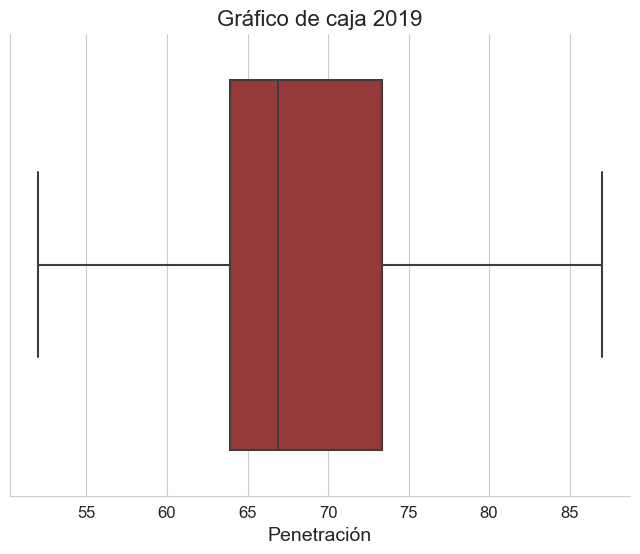

In [55]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2019'], color="brown")
plt.title("Gráfico de caja 2019", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

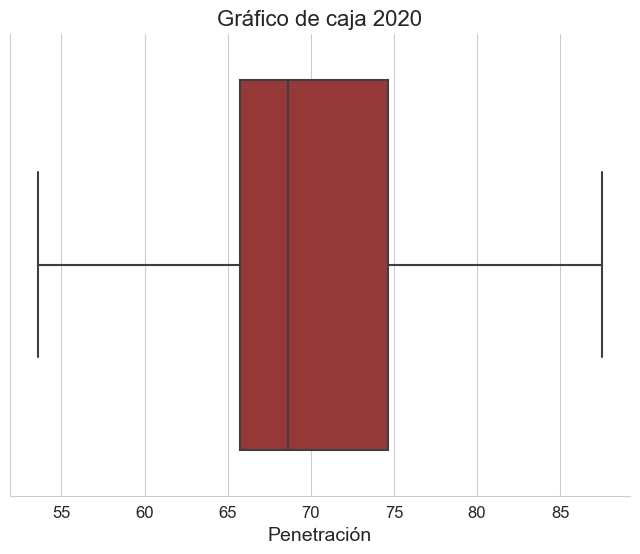

In [56]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2020'], color="brown")
plt.title("Gráfico de caja 2020", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

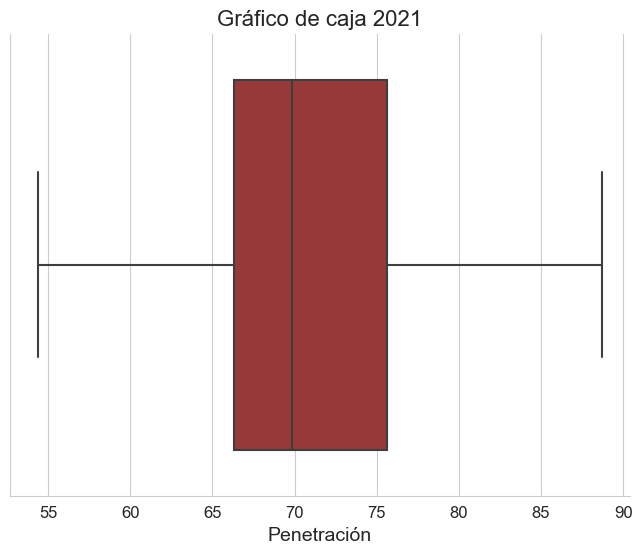

In [57]:
# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_kpi1['2021'], color="brown")
plt.title("Gráfico de caja 2021", fontsize=16)
plt.xlabel("Penetración", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

In [61]:
# Observamos más en detalle
df_kpi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prefecture   336 non-null    object 
 1   year         336 non-null    object 
 2   penetration  336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


In [ ]:
# Primero, creamos una columna nueva con la información de penetración de cada prefectura para cada año
df_kpi1 = df_kpi1.melt(id_vars=['prefecture'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020', '2021'], var_name='year', value_name='penetration')

In [62]:
df_kpi1['year'] = df_kpi1['year'].astype(int)


In [65]:

# Agrupamos los datos por año y calculamos la media de las % prefectures
df_yearly1 = df_kpi1.groupby('year')['penetration'].mean()
print("%Penetración: ", df_yearly1)

%Penetración:  year
2015    61.527083
2016    63.766667
2017    64.958333
2018    67.216667
2019    68.868750
2020    70.410417
2021    71.279167
Name: penetration, dtype: float64


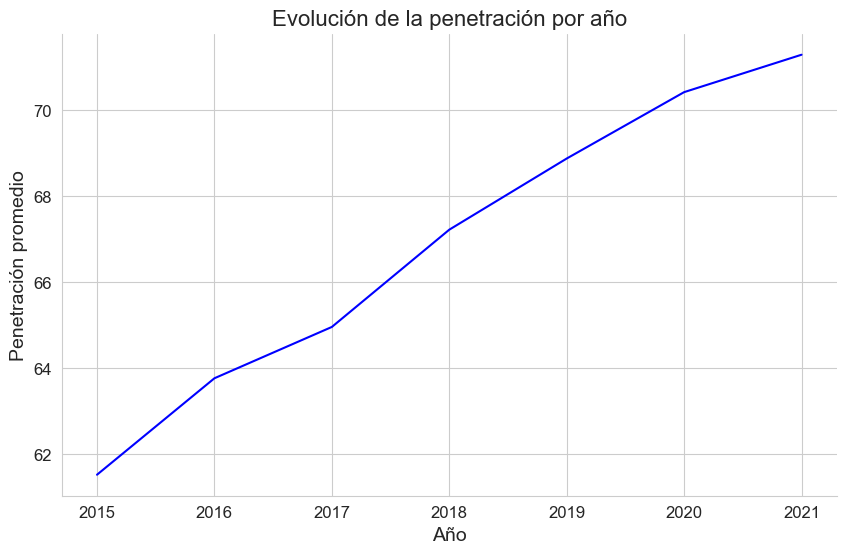

In [67]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_yearly1, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Penetración promedio', fontsize=14)
plt.title('Evolución de la penetración por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# el crecimiento ha sido consistente al pasar los años, aunque bajo un poco del 2020 al 2021 ha crecido

# KPI 2

In [ ]:
# 

---

# KPI 3

In [ ]:
#

---

# KPI 4

In [ ]:
#

---

# KPI 5

# KPI 5 Reducir la pérdida de producto interno bruto frente a eventos sísmicos
Reducir en un 50% la pérdida de PIB en los próximos 35 años.

Tomando en cuenta las medidas preventivas contra la inflación y programas gubernamentales para manejar adecuadamente este tipo de eventos sísmicos, además, de fondos preparados que sirvan como fondo de emergencias para este tipo de eventos

Objetivo: reducir la pérdida de PIB
Indicador: 50%
Plazo: 35 años
Meta: reducir 50% de las pérdidas del PIB en 35 años
Monitoreo: con las bases de datos por país, se analiza y se comparan los datos en los próximos 35 años.
Relevante: porque está alineado con el objetivo 2 de Implementar mecanismos de comunicación y alerta a la comunidad civil por que en la medida que se apliquen las acciones preventivas el daño en edificios será menor y se podrá reactivar la economía más rápidamente pues habría avisos previos que afectan las medidas de seguridad y no quedar tan afectados económicamente.


In [9]:
# KPI 5 Reducir la pérdida de producto interno bruto frente a eventos sísmicos
# Ingestamos el archivo json (GDP (1960 - 2021).json)
df_gdp = pd.read_json("Datasets/KPI 5/GDP (1960 - 2021).json")

# Observamos
df_gdp.sample(3)

,idCountry,code,year,gdp(current US$)
63,2,JPN,1981,1.218989e+12
125,1,USA,2001,1.058193e+13
5,1,USA,1961,5.633000e+11


In [10]:
# Observamos más en detalle
df_gdp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idCountry         186 non-null    int64  
 1   code              186 non-null    object 
 2   year              186 non-null    int64  
 3   gdp(current US$)  186 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.3+ KB


las variables estan con el tipo de dato adecuado y no hay nulos, es apropiado para trabajar

In [11]:
# Observamos el comportamiento de las variables numéricas
df_gdp.describe()


,idCountry,year,gdp(current US$)
count,186.0000,186.000000,1.860000e+02
mean,2.0000,1990.500000,3.768088e+12
std,0.8187,17.943831,5.124427e+12
min,1.0000,1960.000000,1.304000e+10
25%,1.0000,1975.000000,3.751121e+11
50%,2.0000,1990.500000,1.232866e+12
75%,3.0000,2006.000000,4.961489e+12
max,3.0000,2021.000000,2.331508e+13


<AxesSubplot: >

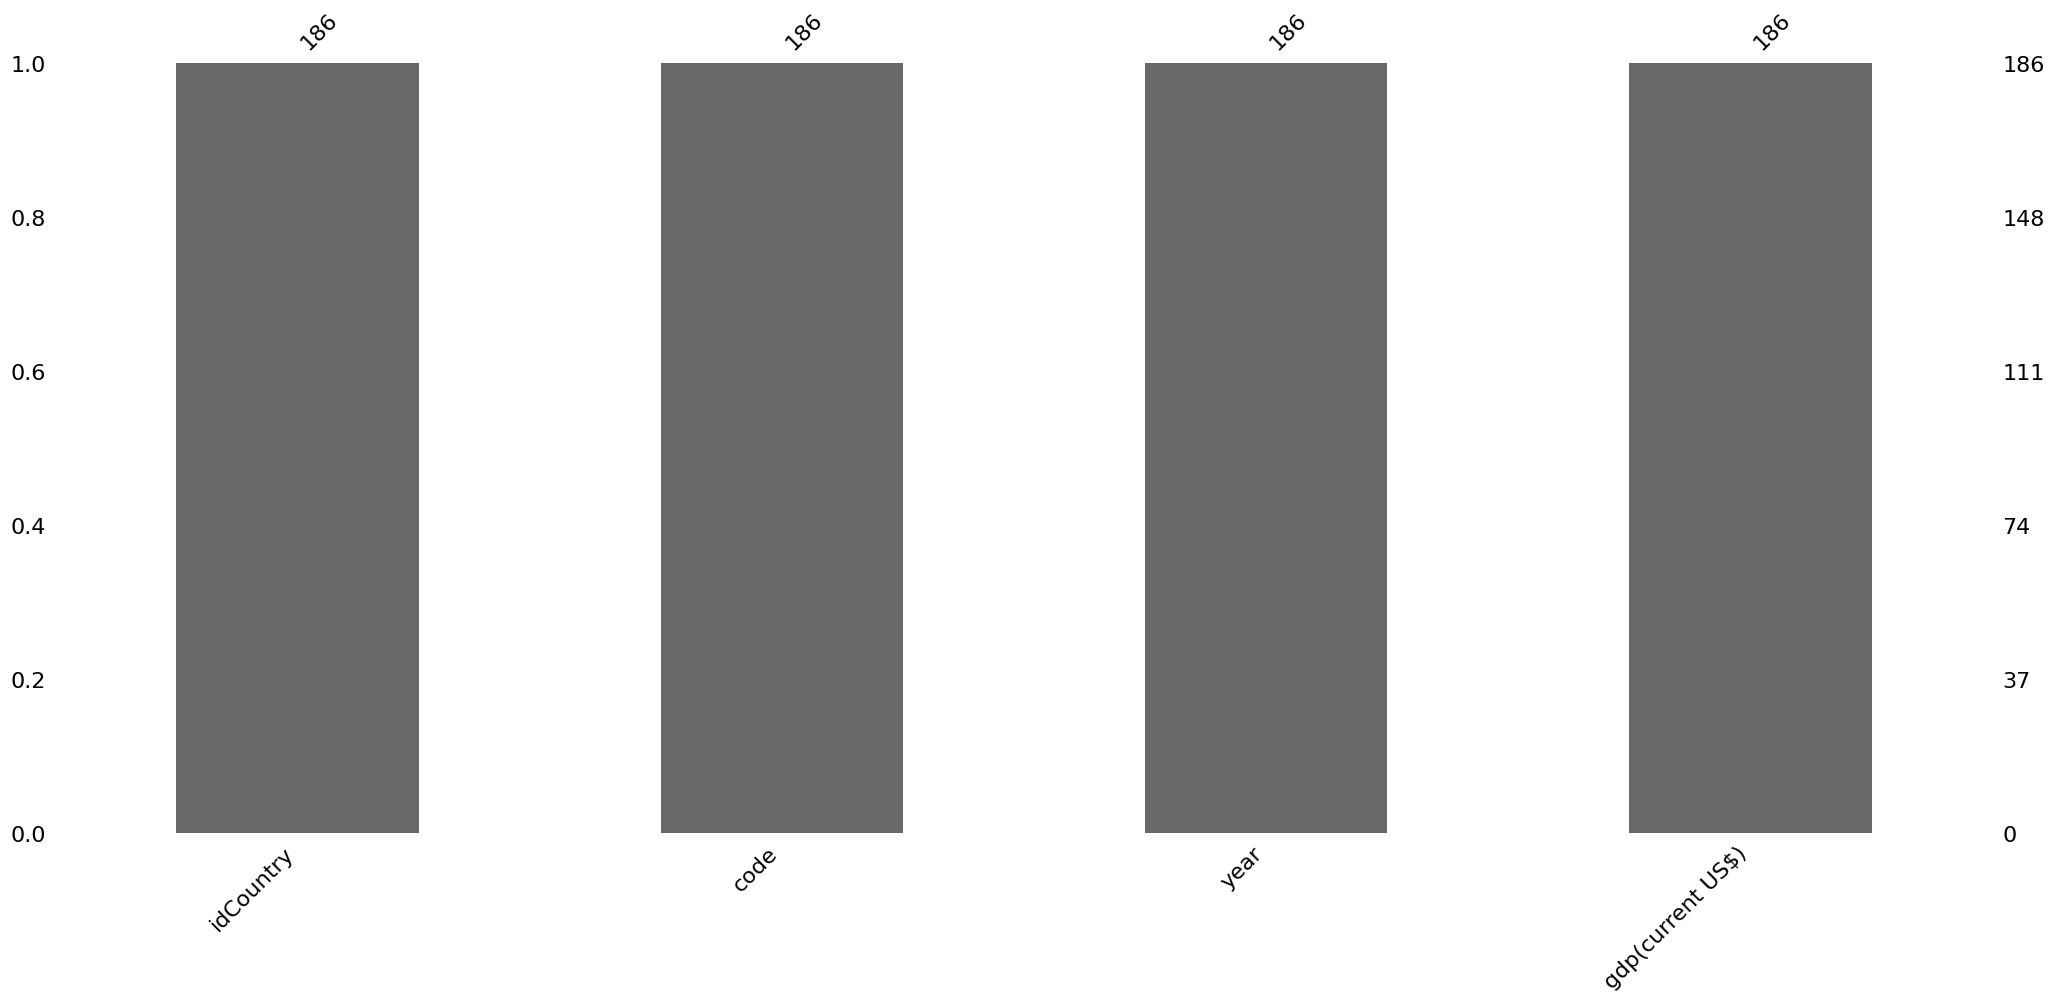

In [12]:
# Observemos los valores faltantes por columna
msno.bar(df_gdp)


la información esta completa en todas las columnas

In [13]:
# Observamos si hay valores duplicados
df_gdp.duplicated().sum()


0

no hay valores duplicados

In [14]:
# Observamos el pais con mas registros 
df_gdp["code"].value_counts().sort_values(ascending=False).head()


code
JPN    62
MEX    62
USA    62
Name: count, dtype: int64

Todos los paises poseen la misma cantidad de registros

In [16]:
# Observamos el porcentaje de PIB en base al total (0 es negativo, 1 positivo)
df_gdp["gdp(current US$)"].value_counts(normalize=True) * 100


gdp(current US$)
4.430734e+10    0.537634
7.721064e+11    0.537634
6.002329e+11    0.537634
9.631174e+12    0.537634
4.968359e+12    0.537634
                  ...   
2.639593e+11    0.537634
3.207041e+12    0.537634
1.134518e+12    0.537634
1.846092e+11    0.537634
2.331508e+13    0.537634
Name: proportion, Length: 186, dtype: float64

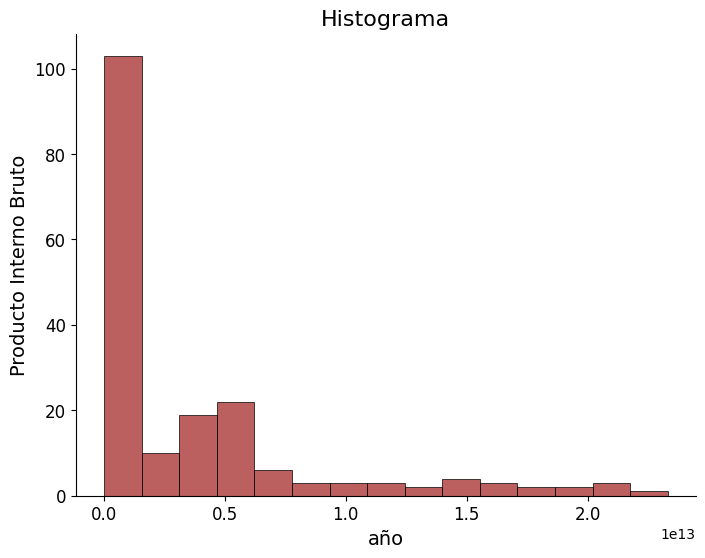

In [18]:
# Histograma del PIB (GDP)
plt.figure(figsize=(8,6))
sns.histplot(df_gdp["gdp(current US$)"] ,bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("año", fontsize=14)
plt.ylabel("Producto Interno Bruto", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


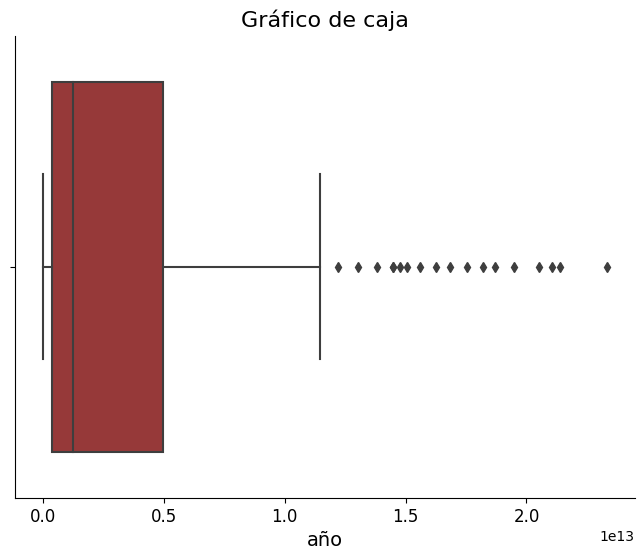

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_gdp["gdp(current US$)"], color="brown")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("año", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()


In [ ]:
# Se observan muchos valores atipicos, pero es normal pues no se espera que los valores de PIB sea estable ( la economia es variable)

<AxesSubplot: xlabel='idCountry', ylabel='gdp(current US$)'>

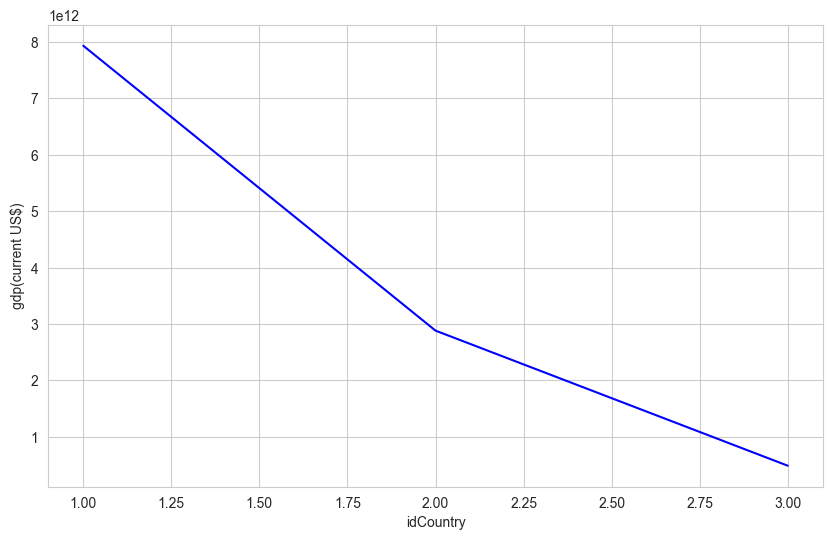

In [23]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped5 = df_gdp.groupby('idCountry')['gdp(current US$)'].mean()

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped5, color='blue')

# se observa la diferencia de Estados Unidos idCountry=1 muy alto con respecto a Japon (idCountry=2) y mucho mas con Mexico(idCountry=3) en el cual este ultimo es muy bajo

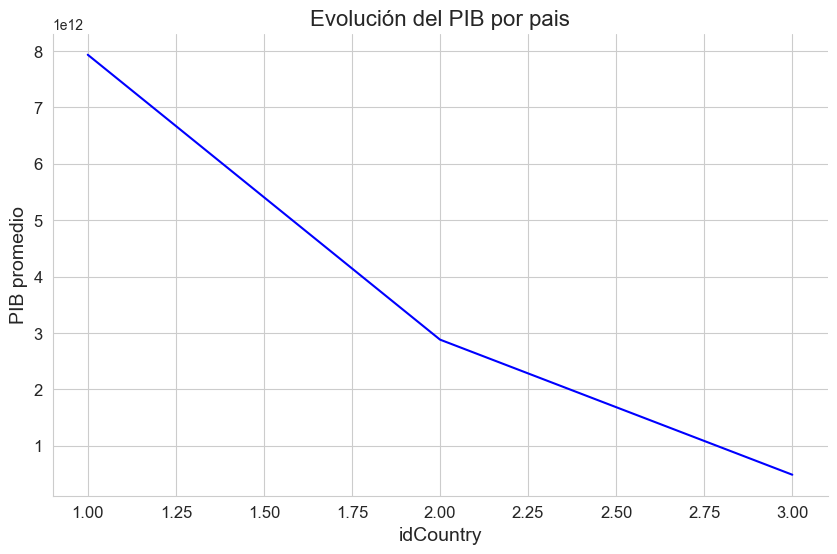

In [29]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped5, color='blue')
plt.xlabel('idCountry', fontsize=14)
plt.ylabel('PIB promedio', fontsize=14)
plt.title('Evolución del PIB por pais', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()
